<a href="https://colab.research.google.com/github/Harsha2303A51773/AIML-2025_B12/blob/main/2303a51773_exam_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Student Performance in High School 1. Identify the top 5 reasons for low performance of students 2. Counts the students with Mother and Father Employed, both employed 3. Find the max and min age of students in high school 4. Name the medium of instruction was most used in school 5. What is the role of extra-curricular activities on student performance. UCI ML Repo Student Performance 6. Apply either Classification Model or Clustering Model to evaluate the dataset.

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/student-por.csv"  # Update with your file path
data = pd.read_csv(file_path, sep=";")

# Display the first few rows to understand the structure of the dataset
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


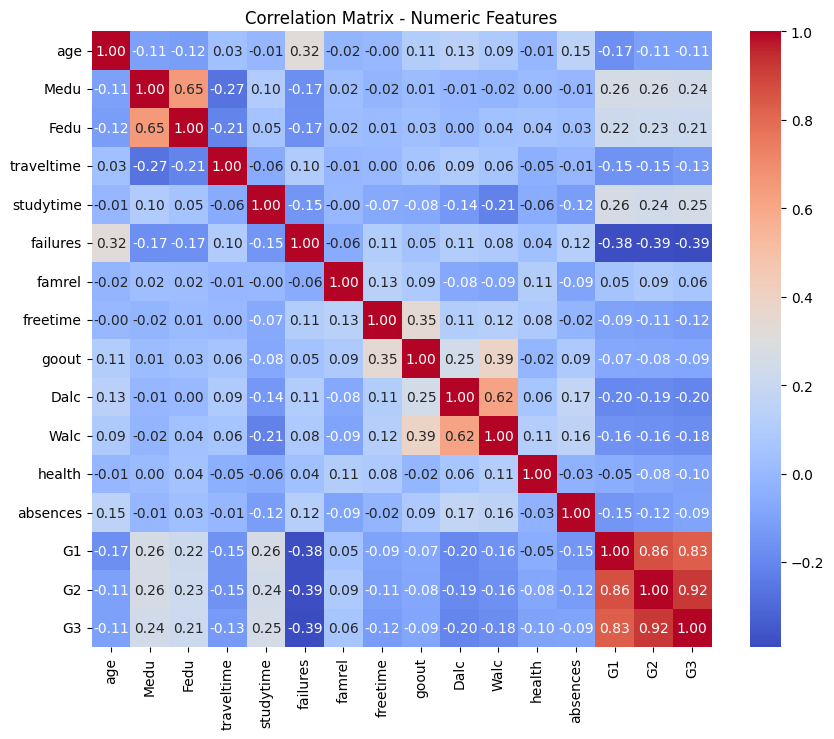

In [23]:
# Analyze features that might impact performance
# Correlation matrix for numeric columns to explore relations
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Numeric Features")
plt.show()

# Observations:
# - High correlation of 'failures' with low performance.
# - 'studytime' and 'family relationship' might also influence performance.


In [24]:
# Analyze parents' employment distribution
mother_employed = data['Mjob'].value_counts()
father_employed = data['Fjob'].value_counts()

print("Mother's employment distribution:")
print(mother_employed)
print("\nFather's employment distribution:")
print(father_employed)

# Count students with both parents employed
both_employed = len(data[(data['Mjob'] != 'at_home') & (data['Fjob'] != 'at_home')])
print(f"\nNumber of students with both parents employed: {both_employed}")


Mother's employment distribution:
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

Father's employment distribution:
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

Number of students with both parents employed: 490


In [25]:
# Find the max and min age of students
max_age = data['age'].max()
min_age = data['age'].min()

print(f"\nMax Age: {max_age}")
print(f"Min Age: {min_age}")



Max Age: 22
Min Age: 15


In [ ]:
# Analyze the most common medium of instruction
school_language = data['school'].value_counts()

print(f"\nMost common school type for medium of instruction: {school_language.idxmax()}")


In [26]:
# Investigate the role of extra-curricular activities on performance
extracurricular_impact = data.groupby('activities')['G3'].mean()

print("\nImpact of extracurricular activities on final grades (G3):")
print(extracurricular_impact)



Impact of extracurricular activities on final grades (G3):
activities
no     11.718563
yes    12.104762
Name: G3, dtype: float64


In [27]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data for classification
X = data.drop(columns=['G3'])  # Drop the target variable
y = data['G3']  # Target variable

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 38.46%


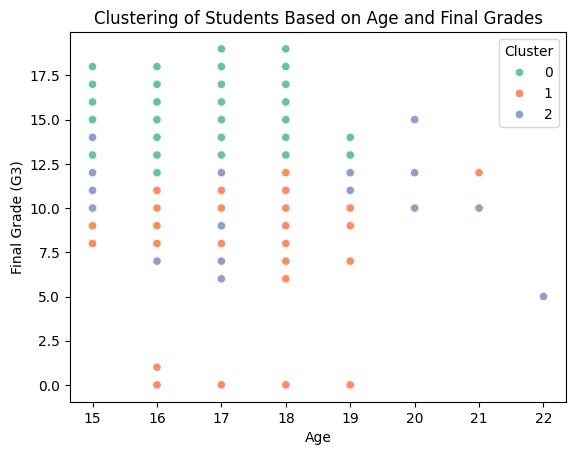

In [28]:
# Step 9: Apply Clustering Model
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize clustering based on age and final grade
sns.scatterplot(x='age', y='G3', hue='Cluster', data=data, palette='Set2')
plt.title("Clustering of Students Based on Age and Final Grades")
plt.xlabel("Age")
plt.ylabel("Final Grade (G3)")
plt.show()


In [29]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# The filename will be the uploaded file's name
file_path = list(uploaded.keys())[0]


Saving student+performance.zip to student+performance (2).zip
